In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding= 'latin1')

In [3]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [5]:
print(df['Year'].unique()[:20])
print(df['Duration'].unique()[:20])

[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)']
[nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min' '96 min' '120 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min']


In [6]:
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [7]:
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [8]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [9]:

df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [10]:
df = df.dropna(subset=['Rating'])

In [11]:
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Duration'] = df['Duration'].fillna(df['Duration'].median())
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

In [12]:
df.fillna('Unknown', inplace=True)

In [13]:
print(df[['Year','Duration','Votes','Rating']].info())
print(df[['Year','Duration']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7919 non-null   float64
 1   Duration  7919 non-null   float64
 2   Votes     7919 non-null   float64
 3   Rating    7919 non-null   float64
dtypes: float64(4)
memory usage: 309.3 KB
None
     Year  Duration
1  2019.0     109.0
3  2019.0     110.0
5  1997.0     147.0
6  2005.0     142.0
8  2012.0      82.0


In [14]:
df.drop_duplicates(inplace=True)

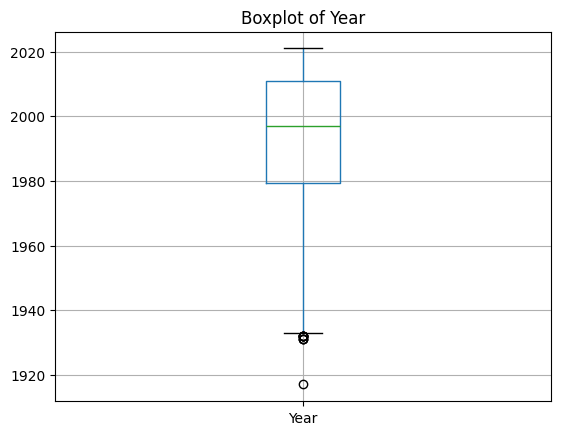

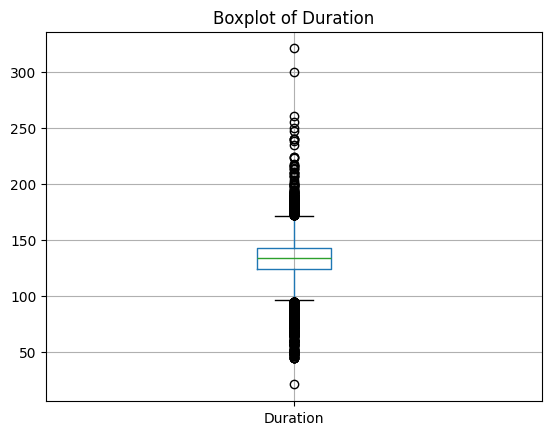

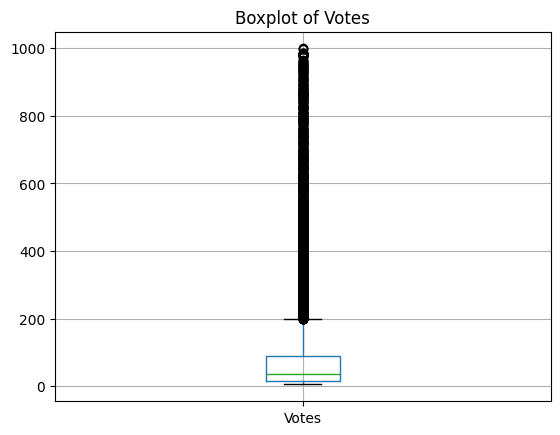

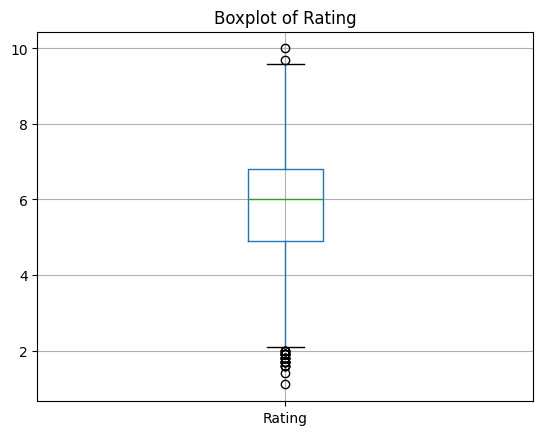

In [15]:
import matplotlib.pyplot as plt
for col in['Year','Duration','Votes','Rating']:
  plt.figure()
  df.boxplot(column = col)
  plt.title(f"Boxplot of {col}")
  plt.show()

In [16]:
import numpy as np


In [17]:
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2025)]
df = df[(df['Duration'] >= 30) & (df['Duration'] <= 300)]
df = df[(df['Rating'] >= 0) & (df['Rating'] <= 10)]

df['Votes'] = np.log1p(df['Votes'])

In [18]:
def keep_top_categories(data, column, top_n=50):
    top = data[column].value_counts().nlargest(top_n).index
    data[column] = data[column].where(data[column].isin(top), 'Other')
    return data

for col in ['Director','Actor 1','Actor 2','Actor 3']:
    df = keep_top_categories(df, col, top_n=50)

In [19]:
def first_genre(text):
    if pd.isna(text):
        return 'Unknown'

    text = str(text).replace(',', '|').replace('/', '|')
    parts = [p.strip() for p in text.split('|') if p.strip()]
    return parts[0] if parts else 'Unknown'

df['Genre1'] = df['Genre'].apply(first_genre)

In [20]:
numeric_cols = ['Year','Duration','Votes']
cat_cols = ['Genre1','Director','Actor 1','Actor 2','Actor 3']

In [21]:
X = df[numeric_cols + cat_cols]
y = df['Rating']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ('num','passthrough',numeric_cols),
        ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output= False),cat_cols),

    ]
)

In [25]:
print(numeric_cols)  # should print ['Year', 'Duration', 'Votes']
print(cat_cols)      # should print ['Genre1','Director','Actor 1','Actor 2','Actor 3']
print(X.columns)

['Year', 'Duration', 'Votes']
['Genre1', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
Index(['Year', 'Duration', 'Votes', 'Genre1', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')


In [28]:
set(numeric_cols + cat_cols) - set(X.columns)

set()

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.pipeline import Pipeline


pipe = Pipeline(steps =[('prep',preprocess),('model',model)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Genre1', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('model', LinearRegression())])

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

pred = pipe.predict(X_test)

print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("R2:",r2_score(y_test,pred))

MAE: 0.9573189185615835
MSE: 1.4746950085577812
R2: 0.17769072133839559


In [32]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)


In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
print("CV R²:", scores.mean())

CV R²: 0.17263865225580713


In [38]:
print(df['Name'].head(20))

1     #Gadhvi (He thought he was Gandhi)
3                                #Yaaram
5                   ...Aur Pyaar Ho Gaya
6                              ...Yahaan
8                     ?: A Question Mark
9                               @Andheri
10             1:1.6 An Ode to Lost Love
11                  1:13:7 Ek Tera Saath
12                              100 Days
13                             100% Love
15                           102 Not Out
18                             10ml LOVE
21                            12 O'Clock
22                            12 O'Clock
25                                 127 B
28           13B: Fear Has a New Address
30                        15 Park Avenue
32                           15th August
33                           16 December
34                                 18.11
Name: Name, dtype: object


In [39]:
def check_movies_ratings(movie_list, df, pipe, numeric_cols, cat_cols):
    results = []
    for name in movie_list:
        row = df[df['Name'] == name]
        if row.empty:
            results.append((name, None, None, "❌ Not found"))
        else:
            X_row = row[numeric_cols + cat_cols]
            pred = pipe.predict(X_row)[0]
            actual = row['Rating'].values[0]
            results.append((name, actual, pred, "✅ Found"))

    results_df = pd.DataFrame(results, columns=["Movie", "Actual Rating", "Predicted Rating", "Status"])
    return results_df

In [40]:
movies_to_check = ["100% Love", "102 Not Out", "#Yaaram", "Avatar"]
results = check_movies_ratings(movies_to_check, df, pipe, numeric_cols, cat_cols)
print(results)

         Movie  Actual Rating  Predicted Rating       Status
0    100% Love            5.7          5.676429      ✅ Found
1  102 Not Out            7.4          6.267083      ✅ Found
2      #Yaaram            4.4          5.589202      ✅ Found
3       Avatar            NaN               NaN  ❌ Not found
